In [15]:
import pandas as pd
import numpy as np
from scipy import stats

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# model preprocessors
from sklearn.model_selection import train_test_split

# model
from sklearn.linear_model import Classification

# evaluation 
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [17]:
df = pd.read_csv("data/heart failure.zip")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
df.head()

In [ ]:
plt.figure(figsize=(10,5))

# Line chart showing
sns.lineplot(df)

In [19]:
df.age

0      75.0
1      55.0
2      65.0
3      50.0
4      65.0
       ... 
294    62.0
295    55.0
296    45.0
297    45.0
298    50.0
Name: age, Length: 299, dtype: float64

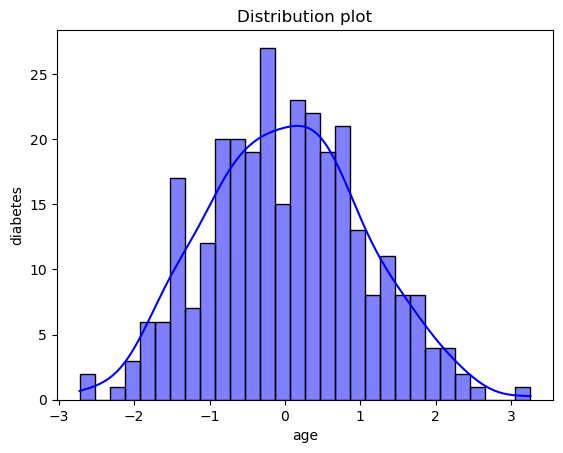

In [21]:
data=np.random.normal(size=300)
sns.histplot(data, kde=True, bins=30,color="blue")

# Show the plot
plt.title("Distribution plot")
plt.xlabel("age")
plt.ylabel("diabetes")
plt.show()

In [ ]:
df.DEATH_EVENT

In [23]:
df.high_blood_pressure

0      1
1      0
2      0
3      0
4      0
      ..
294    1
295    0
296    0
297    0
298    0
Name: high_blood_pressure, Length: 299, dtype: int64

In [25]:

df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


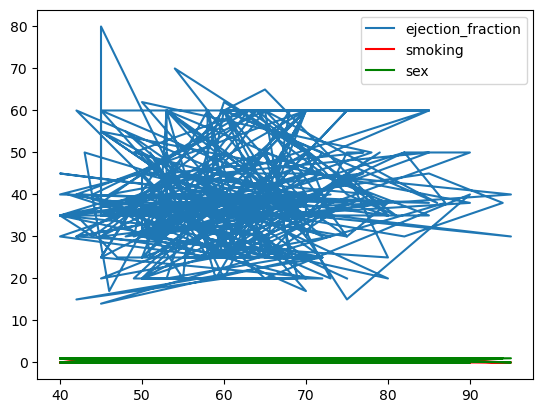

In [27]:
plt.plot(df["age"], df['ejection_fraction'], label="ejection_fraction")
plt.plot(df["age"], df['smoking'], color="red", label="smoking")
plt.plot(df["age"], df['sex'], color="green", label="sex")


plt.legend()

In [29]:
x = df.drop("DEATH_EVENT", axis=1)


In [31]:
x

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [33]:
y=df.DEATH_EVENT

In [35]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [37]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)

In [41]:
rg = LinearRegression()

In [43]:
rg.fit(xtrain,ytrain)

LinearRegression()

In [45]:
rg.coef_

array([ 5.95024946e-03,  3.58246011e-02,  5.43908223e-05,  5.35765924e-02,
       -1.18702613e-02, -3.22965575e-02, -1.17186761e-07,  5.68085768e-02,
       -5.20890939e-03, -5.75560677e-02,  2.31408419e-02, -2.65875953e-03])

In [47]:
rg.intercept_


1.3777201675673818

In [49]:
xtest,ytest

(        age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
 238  65.000        1                       720         1                 40   
 202  70.000        0                        97         0                 60   
 225  75.000        0                       675         1                 60   
 82   60.000        1                        76         1                 25   
 104  60.000        0                        53         0                 50   
 207  85.000        0                       212         0                 38   
 243  73.000        1                      1185         0                 40   
 156  52.000        1                        58         0                 35   
 34   65.000        0                        94         1                 50   
 106  55.000        0                       748         0                 45   
 8    65.000        0                       157         0                 65   
 126  46.000        0                   

In [51]:
ypred = rg.predict(xtest)
ypred

array([ 0.17817892, -0.1905669 ,  0.05438173,  0.75826581,  0.23276642,
        0.2101275 ,  0.12983372,  0.33026172,  0.36823615,  0.24939   ,
        0.31039246,  0.65581458,  0.26507046,  0.26562163,  0.44071958,
        0.46227891, -0.08125216,  0.39256197, -0.27656973,  0.31227083,
        0.26882031, -0.06871094,  0.70912245,  0.27550972,  0.19674687,
        0.45823951,  0.48221292,  0.59485796,  0.06244023,  0.43411022,
        0.43272745,  0.72900348,  0.20543409,  0.37720954,  0.26321848,
        0.21925618,  0.65924172,  0.46555151,  0.35787531,  0.64911517,
       -0.04117059,  0.60874961,  0.41811941,  0.38362159,  0.4488766 ,
        0.23272075, -0.02940722,  0.82053066, -0.05056739,  0.57536763,
        0.34286259,  0.15371281,  0.1636896 ,  0.59019435,  0.65633865,
        0.26306019,  0.39497045,  0.45350845,  0.46655129, -0.13760521])